In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sn
import matplotlib.pyplot as plt

import sklearn.preprocessing as preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Necessary imports

# PART 1

In [2]:
OD = pd.read_csv("data.csv")

In [3]:
# OD.dtypes
# 4. 13

the data types of each column in my dataframe

In [7]:
#OD["radius_mean"].describe()
#OD.describe(include = 'all')
#OD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
OD.drop("Unnamed: 32", axis = 1, inplace = True)
OD.drop("id", axis = 1, inplace = True)

The first column has id informartions that we don't need these data and last column is fulled with NaN values. So these should be dropped.

In [6]:
ND = OD
NDnumpyarray = ND.iloc[:,1:].values

"diagnosis" columns shouldn't be in the data while we are normalizing the data

### NORMALIZATION


In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
numpyarray_scaled = min_max_scaler.fit_transform(NDnumpyarray)
ND = pd.DataFrame(numpyarray_scaled)

Normalization of original data is ND

In [8]:
OD_columns_list = ['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity',
       'concave', 'symmetry', 'fractal',
       'radius_s', 'texture_s', 'perimeter_s', 'area_s',
       'smoothness_s', 'compactness_s', 'concavity_s',
       'concave_s', 'symmetry_s', 'fractal_s',
       'radius_w', 'texture_w', 'perimeter_w', 'area_w',
       'smoothness_w', 'compactness_w', 'concavity_w',
       'concave_w', 'symmetry_w',
       'fractal_w', 'diagnosis']

Abbreviated feature names list for plots.

In [9]:
ND.columns = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

Adding the column names to normalized dataframe

In [10]:
ND["diagnosis"] = OD.loc[:,["diagnosis"]]


Adding the "diagnosis" column to Normalized Dataframe.

In [11]:
diagnosis = OD.loc[:,["diagnosis"]]
OD.drop("diagnosis", axis = 1, inplace = True)
OD["diagnosis"] = diagnosis

To make two dataframe look the same in terms of column, add the "diagnosis" column to the end of Original Dataframe.

In [12]:
OD = OD.replace("M", 1)
OD = OD.replace("B", 0)

Replace the diagnosis symbols at Original Data. 0 for malignant, 1 for benign.

In [13]:
ND = ND.replace("M", 1)
ND = ND.replace("B", 0)

Replace the diagnosis symbols at Normalized Data. 0 for malignant, 1 for benign.

### CORRELATION

In [8]:
# Correlationları ayrı ayrı da göster!!!!!

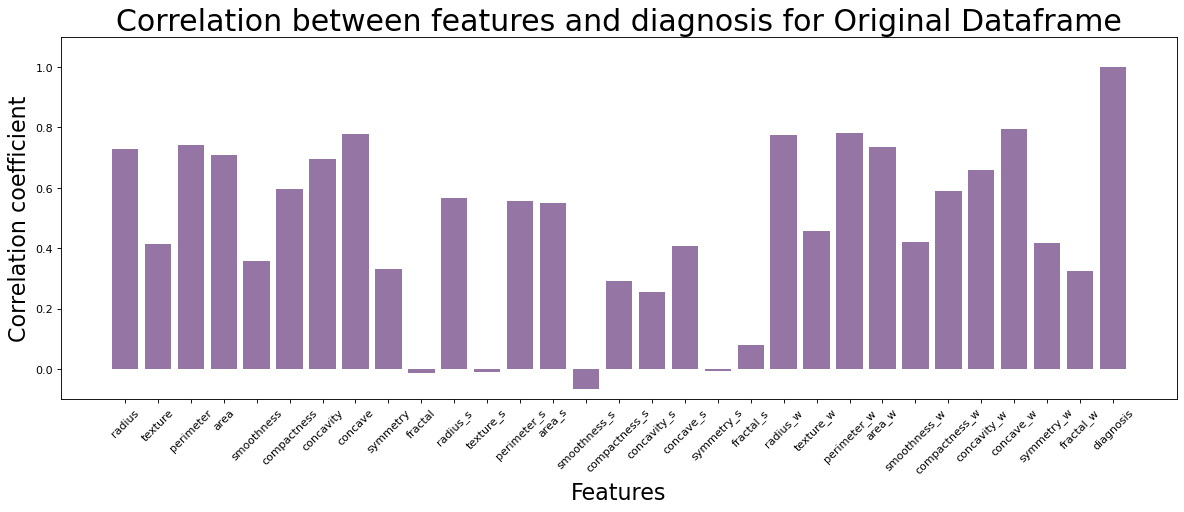

In [14]:
corr_OD_fig = plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
corr_OD = corr_OD_fig.add_subplot(111)
correlations_OD =[]

for column in OD.columns:
    # print('Correlation between '+ column + ' and ' + 'diagnosis : ', np.corrcoef(np.array(OD[column]), np.array(OD['diagnosis']))[0][1])
    correlations_OD.append(np.corrcoef(np.array(OD[column]), np.array(OD['diagnosis']))[0][1])

plt.bar(OD_columns_list,  correlations_OD, color = (0.3,0.1,0.4,0.6))       

plt.title('Correlation between features and diagnosis for Original Dataframe',fontsize=27)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Correlation coefficient',fontsize=20)    

plt.ylim(-0.1,1.1)
plt.xticks(rotation=45)
plt.show()    
    

It is showed the relationship between features and diagnosis to find out which feature is more effective for finding the diagnosis.

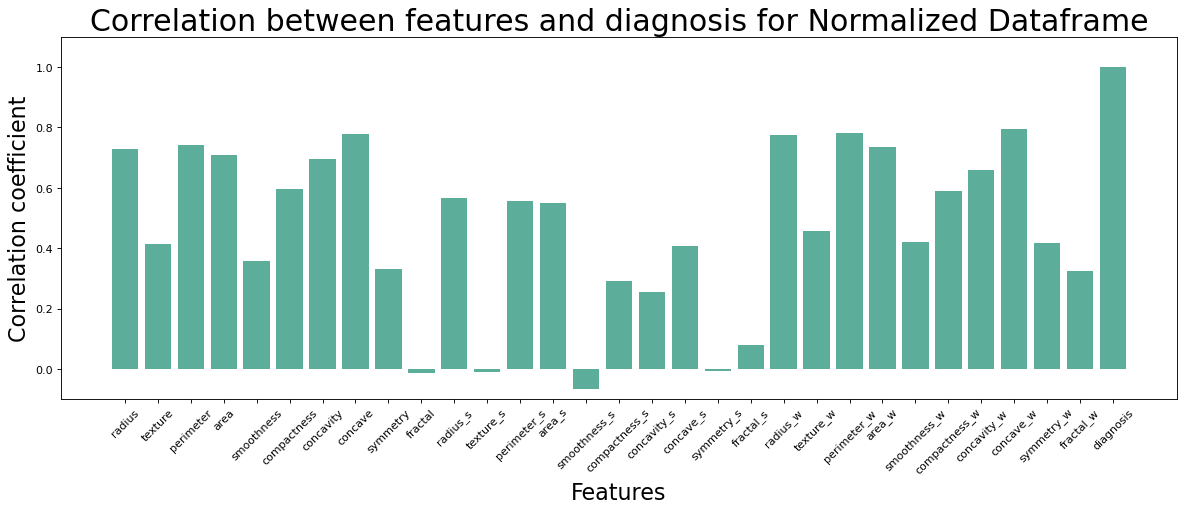

In [15]:
corr_ND_fig = plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
corr_ND = corr_ND_fig.add_subplot(111)
correlations_ND =[]

for column in ND.columns:
    # print('Correlation between '+ column + ' and ' + 'diagnosis : ', np.corrcoef(np.array(ND[column]), np.array(ND['diagnosis']))[0][1])
    correlations_ND.append(np.corrcoef(np.array(ND[column]), np.array(ND['diagnosis']))[0][1])

plt.bar(OD_columns_list,  correlations_ND, color = (0.2,0.6,0.5,0.8))       

plt.title('Correlation between features and diagnosis for Normalized Dataframe',fontsize=27)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Correlation coefficient',fontsize=20)    

plt.ylim(-0.1,1.1)
plt.xticks(rotation=45)
plt.show()    
    

By looking at these two graphs, it was determined that the min-max normalization of the original data did not affect the correlation between the features.

 ### CLUSTERING

In [16]:
kmeans = KMeans(n_clusters = 2)

Selected clustering algorithm is K-means. 

In [17]:
clustered_array = StandardScaler().fit_transform(OD.iloc[:,:-1])


Create a numpy array from Original Dataframe to run K-means algorithm without "diagnosis" column.

In [18]:
model = kmeans.fit(clustered_array) 
OD_clustered_part1 = OD.copy()
OD_clustered_part1["diagnosis_clustered"] = kmeans.predict(clustered_array)

Implementation of K-means clustering algorithm to Original Dataframe.

In [19]:
clustered_array_ND = StandardScaler().fit_transform(ND.iloc[:,:-1])

Create a numpy array from Normalized Dataframe to run K-means algorithm without "diagnosis" column.

In [20]:
model_ND = kmeans.fit(clustered_array_ND) 
ND_clustered_part1 = ND.copy()
ND_clustered_part1["diagnosis_clustered"] = kmeans.predict(clustered_array_ND)

Implementation of K-means clustering algorithm to Normalized Dataframe.

In [21]:
benign_count_OD = 0
clustered_benign_count_OD = 0
malignant_count_OD = 0
clustered_malignant_count_OD = 0

for key, value in OD_clustered_part1.iterrows():
    if value[-2] == 0:
        malignant_count_OD = malignant_count_OD + 1 
    elif value[-2] == 1:
        benign_count_OD = benign_count_OD + 1 
    if value[-1] == 0:
        clustered_malignant_count_OD = clustered_malignant_count_OD + 1 
    elif value[-1] == 1:
        clustered_benign_count_OD = clustered_benign_count_OD + 1 
    

Calculation of real malignant-benign count and malignant-benign count after K-means clustering in the Original Dataframe.

In [22]:
benign_count_ND = 0
clustered_benign_count_ND = 0
malignant_count_ND = 0
clustered_malignant_count_ND = 0

for key, value in ND_clustered_part1.iterrows():
    if value[-2] == 0:
        malignant_count_ND = malignant_count_ND + 1 
    elif value[-2] == 1:
        benign_count_ND = benign_count_ND + 1 
    if value[-1] == 0:
        clustered_malignant_count_ND = clustered_malignant_count_ND + 1 
    elif value[-1] == 1:
        clustered_benign_count_ND = clustered_benign_count_ND + 1 
    

Calculation of real malignant-benign count and malignant-benign count after K-means clustering in the Normalized Dataframe.

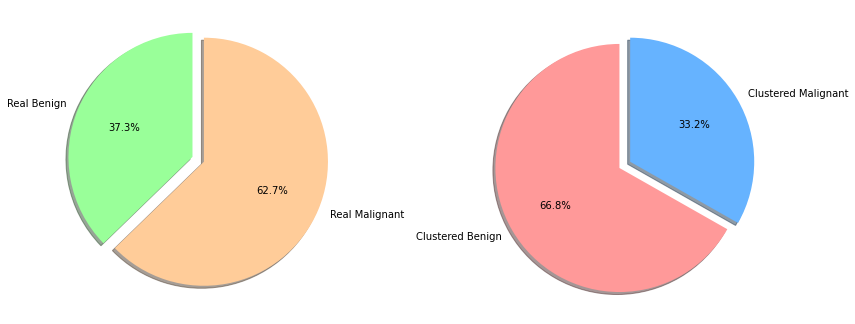

In [23]:
labels1 = ['Real Benign', 'Real Malignant']
sizes1 = [benign_count_OD, malignant_count_OD]

explode = (0.1, 0)

colors1 = ['#99ff99','#ffcc99']


labels2 = ['Clustered Benign', 'Clustered Malignant']
sizes2 = [clustered_benign_count_OD, clustered_malignant_count_OD]

colors2 = ['#ff9999','#66b3ff']

fig_OD_pie, ax_OD_pie = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

ax_OD_pie[0].pie(sizes1, labels=labels1, explode=explode, colors=colors1, 
                 autopct='%1.1f%%', shadow=True, startangle=90)


ax_OD_pie[1].pie(sizes2, labels=labels2, explode=explode, colors=colors2, 
                 autopct='%1.1f%%', shadow=True, startangle=90)

fig_OD_pie.tight_layout()
plt.show()

    Distribution of real diagnosis in Original Dataframe and distribution of clustered diagnosis in Original Dataframe

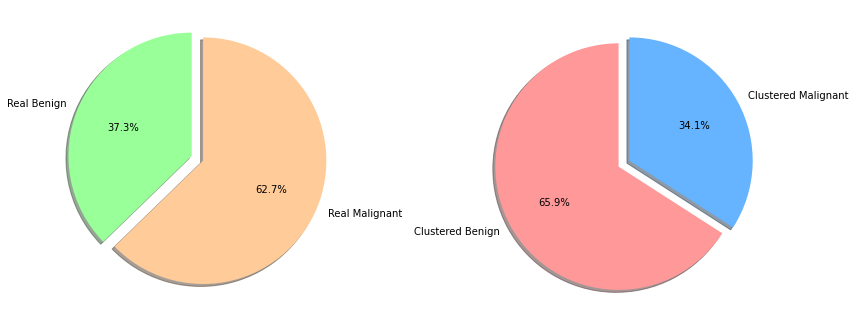

In [24]:
labels1 = ['Real Benign', 'Real Malignant']
sizes1 = [benign_count_ND, malignant_count_ND]

explode = (0.1, 0)

colors1 = ['#99ff99','#ffcc99']


labels2 = ['Clustered Benign', 'Clustered Malignant']
sizes2 = [clustered_benign_count_ND, clustered_malignant_count_ND]

colors2 = ['#ff9999','#66b3ff']

fig_ND_pie, ax_ND_pie = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

ax_ND_pie[0].pie(sizes1, labels=labels1, explode=explode, colors=colors1, 
                 autopct='%1.1f%%', shadow=True, startangle=90)


ax_ND_pie[1].pie(sizes2, labels=labels2, explode=explode, colors=colors2, 
                 autopct='%1.1f%%', shadow=True, startangle=90)

fig_ND_pie.tight_layout()
plt.show()

    Distribution of real diagnosis in Normalized Dataframe and distribution of clustered diagnosis in Normalized Dataframe

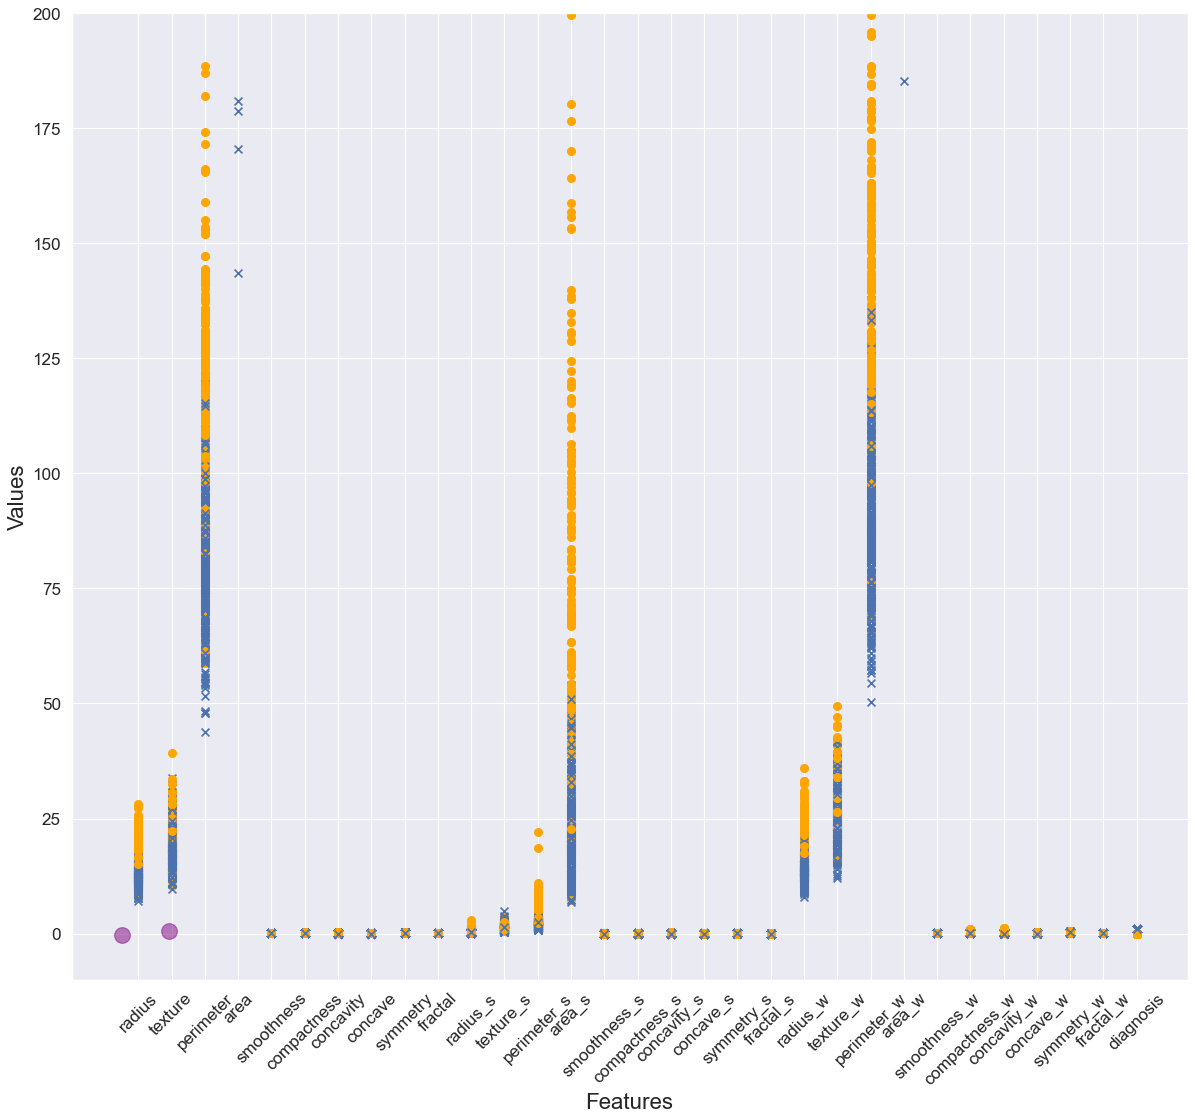

In [47]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax3 = fig.add_subplot(111)
i = 0

OD_clustered_part12 = OD_clustered_part1.copy()
OD_clustered_part12.drop("diagnosis", axis = 1, inplace = True)

for index, row in OD_clustered_part12.iterrows():
    if row[-1] == 0 : 
        ax3.scatter(x = OD_columns_list,y = OD_clustered_part12.iloc[i,:] , s=50, c= 'orange', marker = 'o') 
    elif row[-1] == 1 :
        ax3.scatter(x = OD_columns_list,y = OD_clustered_part12.iloc[i,:] , s=50, c= 'b', marker = 'x') 
      
    i= i + 1
    

plt.xlabel('Features',fontsize=20)
plt.ylabel('Values',fontsize=20)        
plt.xticks(rotation=45)   
plt.ylim((-10,200))
plt.grid(True)
    
centers = kmeans.cluster_centers_
ax3.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

plt.show()


The center points of K-means clusters for Original Dataframe are shown.

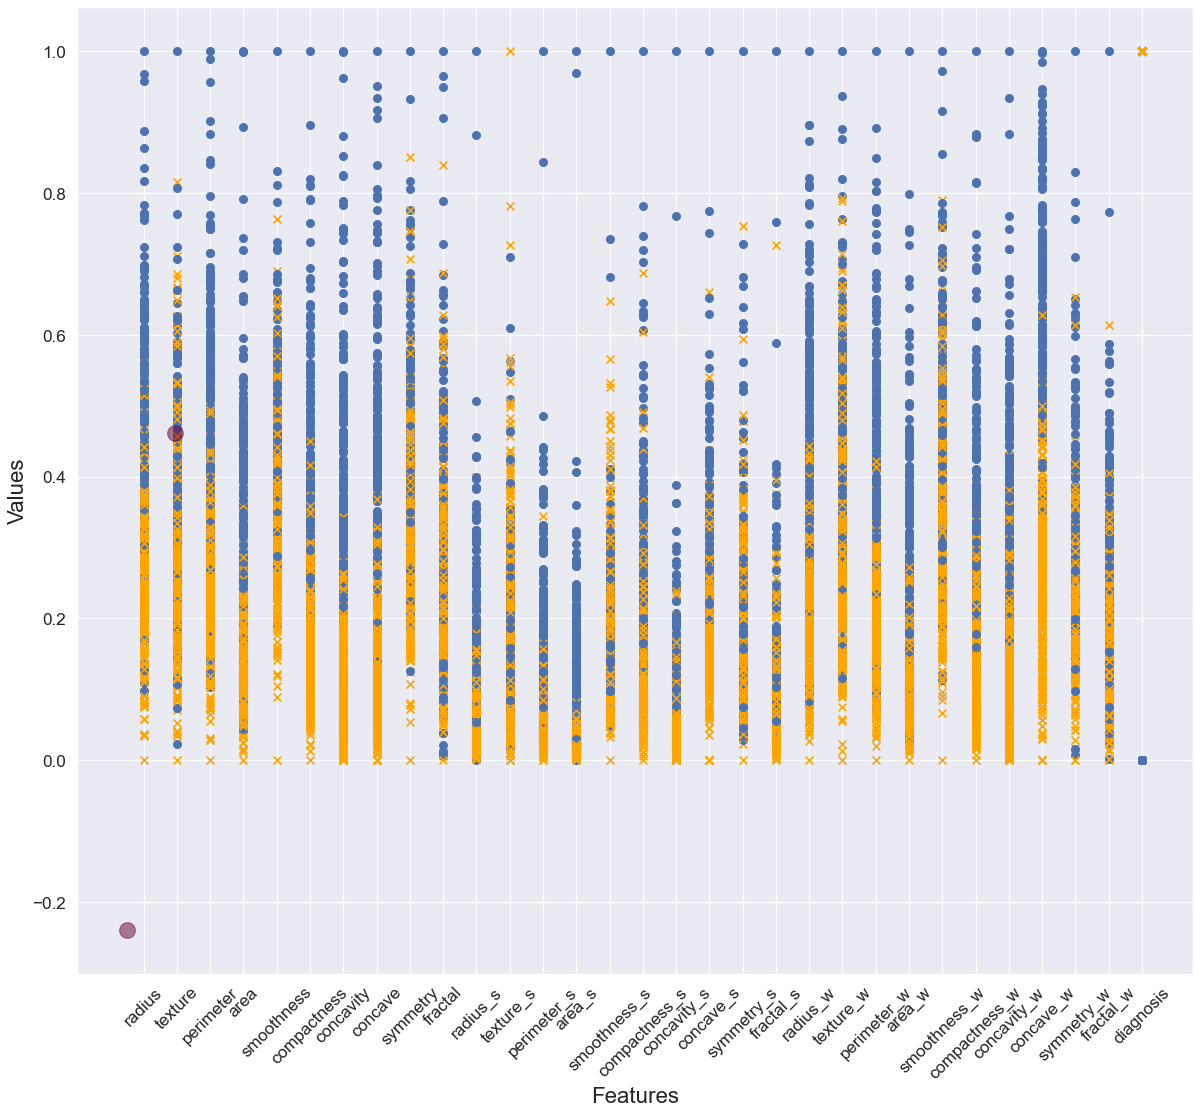

In [48]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax4 = fig.add_subplot(111)
i = 0
ND_clustered_part12 = ND_clustered_part1.copy()
ND_clustered_part12.drop("diagnosis", axis = 1, inplace = True)
#y_kmeans = kmeans.predict(X)

for index, row in ND_clustered_part12.iterrows():
    if row[-1] == 0 : 
        ax4.scatter(x = OD_columns_list,y = ND_clustered_part12.iloc[i,:] , s=50, c= 'b', marker = 'o') 
    elif row[-1] == 1 :
        ax4.scatter(x = OD_columns_list,y = ND_clustered_part12.iloc[i,:] , s=50, c= 'orange', marker = 'x') 
    i= i + 1
    
    
plt.xlabel('Features',fontsize=20)
plt.ylabel('Values',fontsize=20)        
plt.xticks(rotation=45)
plt.grid(True)

centers = kmeans.cluster_centers_
ax4.scatter(centers[:, 0], centers[:, 1], c='#660033', s=200, alpha=0.5);
plt.show()


The center points of K-means clusters for Original Dataframe are shown.

### CONCLUSION

   After the implementation K-means algorithm we can see that the real diagnosis and the clustered diagnosis values is pretty similar. To show this similarty, pie charts help us to visualize this in percentages of the benign-malignent relationship. When looking at the results, Normalization of the original dataset is important because the process made our model more accurate. If we look at the center points of K-means clusters, we can see the points are at different positions. Then, we can say the normalization process operated clustering algorithm from a different perspective. 
   
   Different execution of this program shows that the accuracy of the model with Original Dataset ∼(more or less) %95-%96.
   The accuracy of the model with Normalized Dataset ∼(more or less) %96-%97.

# PART 2

In [27]:
OD_part2 = OD.copy()
ND_part2 = ND.copy()

In [28]:
X_train_OD, X_test_OD, y_train_OD, y_test_OD = train_test_split(OD_part2.iloc[:,:-1], OD_part2.iloc[:,[-1]], train_size = 0.7, test_size = 0.3, random_state = 0)
#print ("X_train: ", X_train_OD)
#print ("y_train: ", y_train_OD)
#print("X_test: ", X_test_OD)
#print ("y_test: ", y_test_OD)

Spliting the Original Dataframe into training and test sets.

In [29]:
X_train_ND, X_test_ND, y_train_ND, y_test_ND = train_test_split(ND_part2.iloc[:,:-1], ND_part2.iloc[:,[-1]], train_size = 0.7, test_size = 0.3, random_state = 0)
#print ("X_train: ", X_train_ND)
#print ("y_train: ", y_train_ND)
#print("X_test: ", X_test_ND)
#print ("y_test: ", y_test_ND)

Spliting the Original Dataframe into training and test sets.

### CLASSIFICATION


Accuracy: %95.32


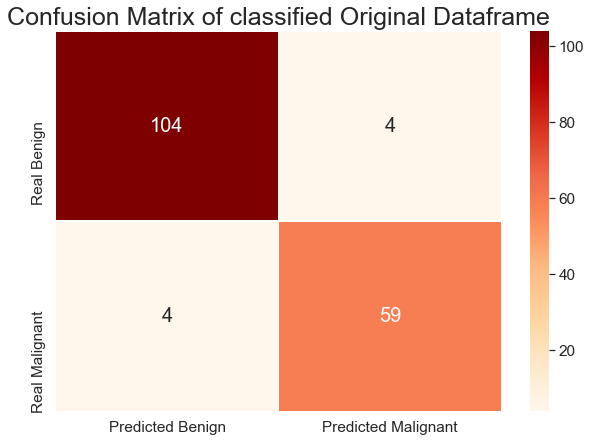

In [45]:
regressor_OD = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor_OD.fit(X_train_OD, y_train_OD.values.ravel())
y_pred_OD = regressor_OD.predict(X_test_OD)

confusion_matrix_OD = pd.DataFrame(confusion_matrix(y_test_OD,y_pred_OD.round()), index = ["Real Benign","Real Malignant"],
                  columns = ["Predicted Benign", "Predicted Malignant"])

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(confusion_matrix_OD, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="OrRd")
plt.title('Confusion Matrix of classified Original Dataframe', size = 25)

#print(classification_report(y_test_OD,y_pred_OD.round()))

print("\nAccuracy: "+ "%" + "%5.2f" %(accuracy_score(y_test_OD, y_pred_OD.round())*100))


Implementation of Random Forest Algorithm as classification to Original Dataframe.


Accuracy: %95.91


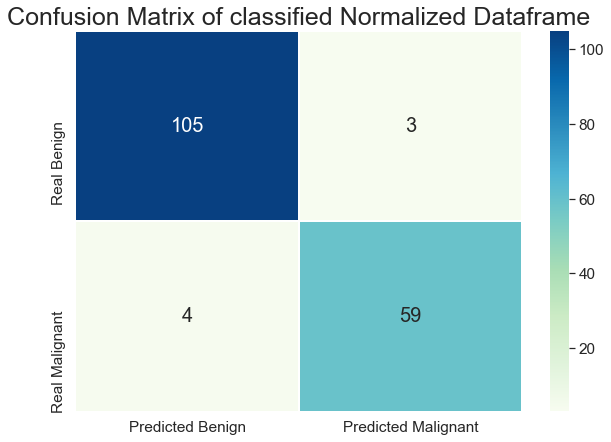

In [46]:
regressor_ND = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor_ND.fit(X_train_ND, y_train_ND.values.ravel())
y_pred_ND = regressor_ND.predict(X_test_ND)

confusion_matrix_ND = pd.DataFrame(confusion_matrix(y_test_ND,y_pred_ND.round()), index = ["Real Benign","Real Malignant"],
                  columns = ["Predicted Benign", "Predicted Malignant"])


plt.figure(figsize = (10,7))
sn.set(font_scale = 1.4)
sn.heatmap(confusion_matrix_ND, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="GnBu")
plt.title('Confusion Matrix of classified Normalized Dataframe', size = 25)


#print(classification_report(y_test_ND,y_pred_ND.round()))

print("\nAccuracy: "+ "%" + "%5.2f" %(accuracy_score(y_test_ND, y_pred_ND.round())*100))


Implementation of Random Forest Algorithm as classification to Normalized Dataframe.

By looking at the confusion matrix obtained as a result of the classification process, it is seen that the normalized data gives more accurate results with the Random Forest Algorithm.

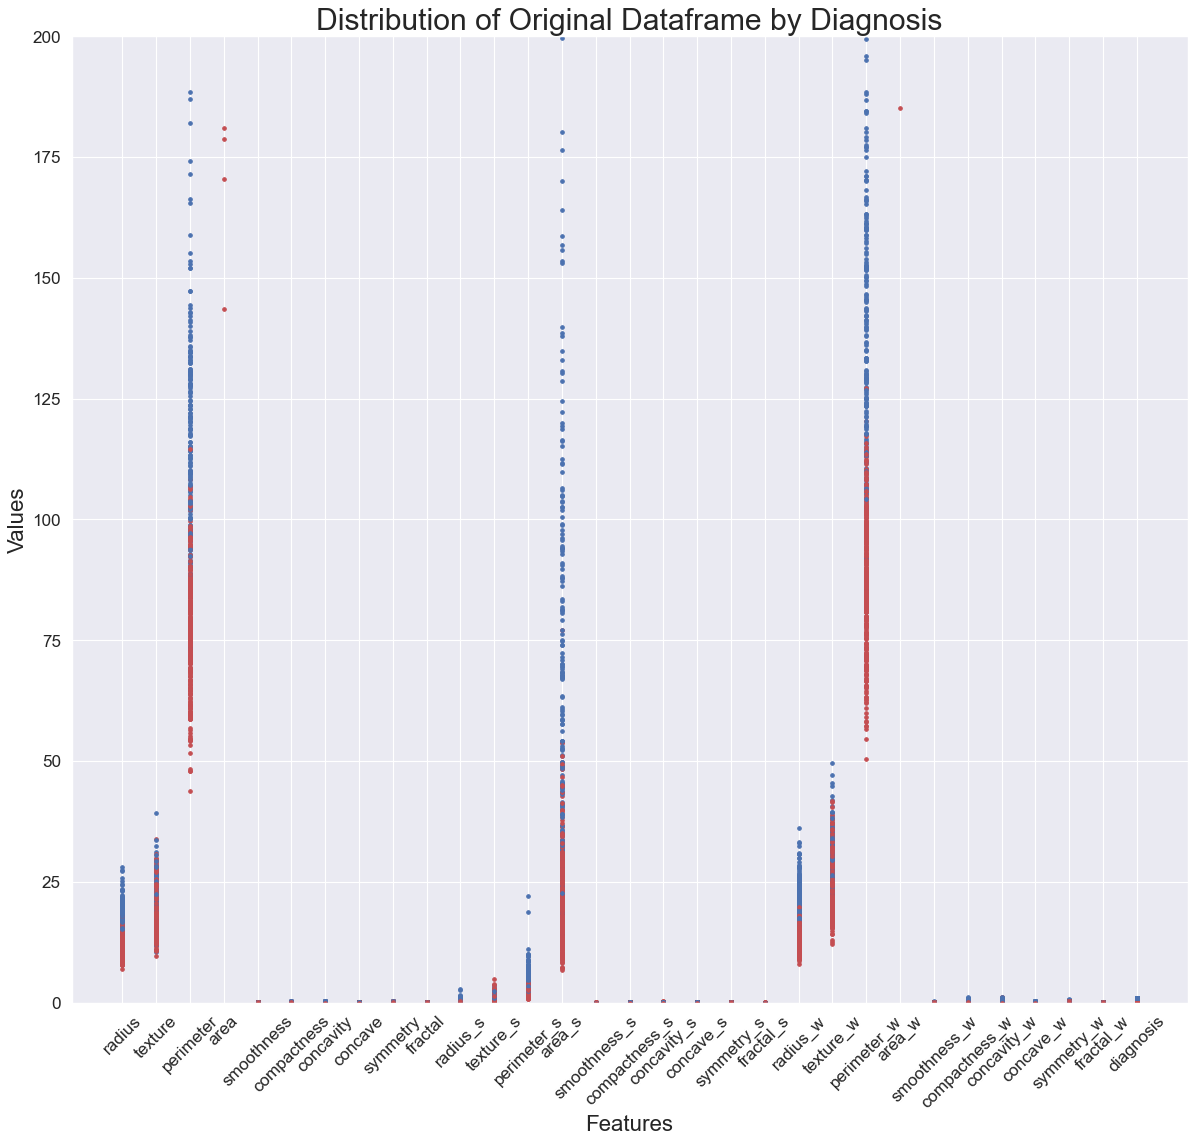

In [32]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(111)
i = 0

for index, row in OD.iterrows():
    if row['diagnosis'] == 0 : 
        ax2.scatter(x = OD_columns_list, y = OD.iloc[[i],:] , s=10, c='r', marker="o")
    elif row['diagnosis'] == 1 :
        ax2.scatter(x = OD_columns_list, y = OD.iloc[[i],:] , s=10, c='b', marker="o")
    else : 
        ax2.scatter(x = OD_columns_list, y = OD.iloc[[i],:], s=10, c='g', marker="o")
    i= i + 1
    
plt.title('Distribution of Original Dataframe by Diagnosis',fontsize=27)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Values',fontsize=20)    

plt.ylim((0,200))

plt.xticks(rotation=45)
plt.show()


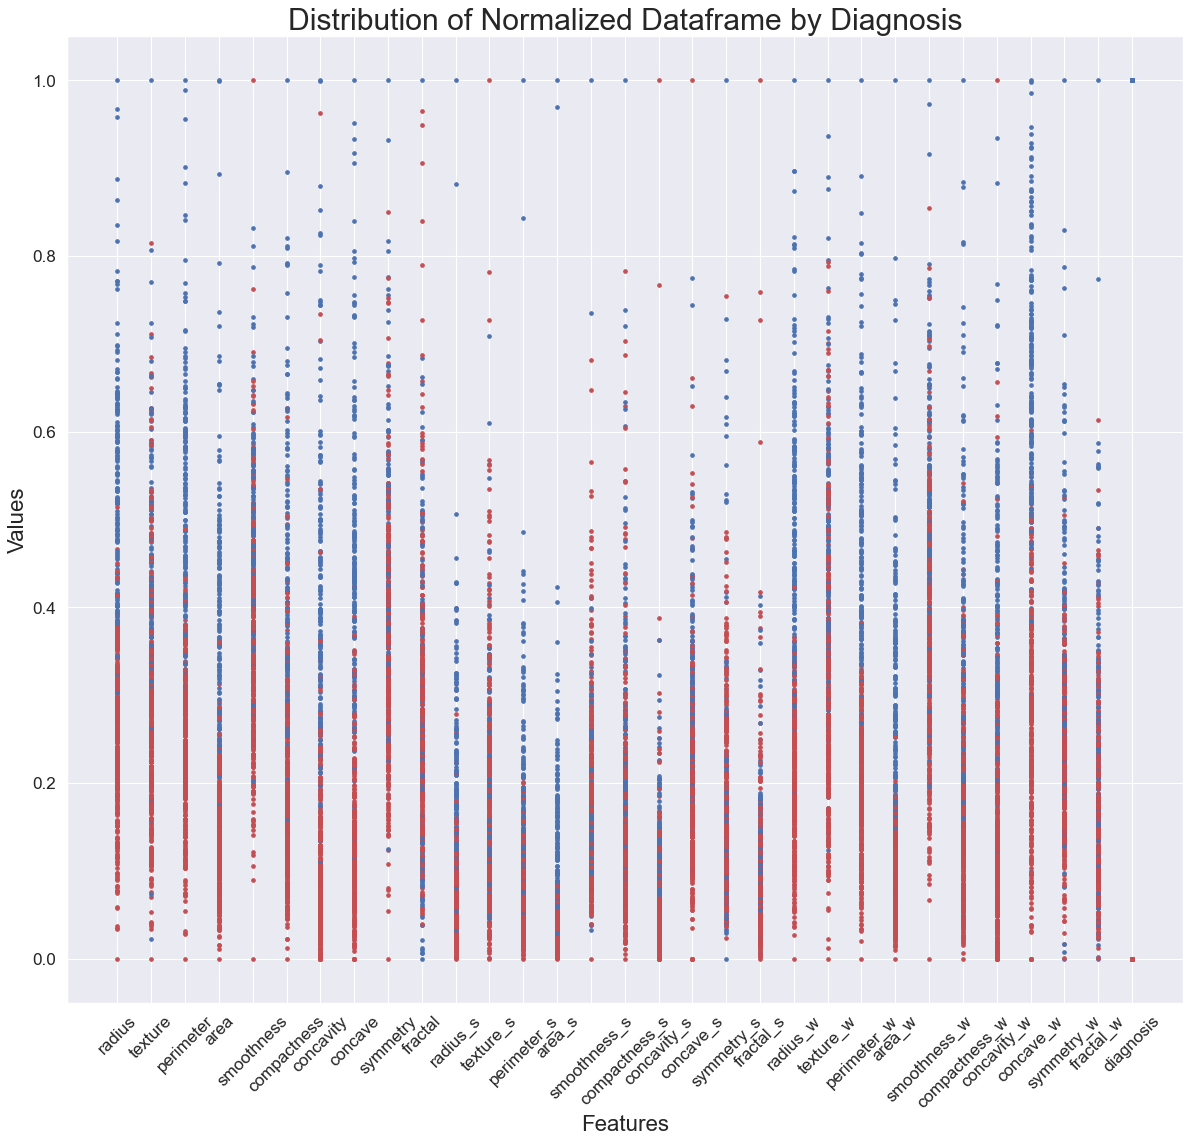

In [33]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
i = 0

for index, row in ND.iterrows():
    if row['diagnosis'] == 0 : 
        ax1.scatter(x = OD_columns_list, y = ND.iloc[[i],:] , s=10, c='r', marker="o")
    elif row['diagnosis'] == 1 :
        ax1.scatter(x = OD_columns_list, y = ND.iloc[[i],:] , s=10, c='b', marker="o")
    else : 
        ax1.scatter(x = OD_columns_list, y = ND.iloc[[i],:], s=10, c='g', marker="o")
    i= i + 1
    
plt.title('Distribution of Normalized Dataframe by Diagnosis',fontsize=27)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Values',fontsize=20)        

plt.xticks(rotation=45)
plt.show()



We can see the distribution of diagnostic data in these two graphs. However, we can compare all the features proportionally with normalized data.